## AI Assignment 2 

### Housing Price Dataset
dataset consist of 81 features and 118260 rows.



## Importing Libraries

In [284]:
import pandas as pd
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
%matplotlib inline


## Data Loading

In [285]:
df=pd.read_csv('data.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


## Missing Value Handling
Checking for null values 

In [286]:
#using this code we can find the total null values in deaseding order with thier percenatages

null_sum = df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending = False)
null_sum

nas = pd.DataFrame(null_sum)
nas["Percent"] = (null_sum.values / len(df) * 100)
nas.columns = ["Nulls", "Percent"]
nas

,Nulls,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945
GarageQual,81,5.547945


From the above we can see that PoolQC, MiscFeature, Alley, Fence, FireplaceQu are some of the features which have 
most of the null values,So we will remove these features from the dataset.

In [287]:
df.drop(["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu"], axis = 1, inplace = True)

## Exploratory Data Analysis

In [288]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Heatmap Chart

/var/folders/k5/gm15b6qn58146slw1_3td6vr0000gn/T/ipykernel_59202/3950482205.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


<AxesSubplot: >

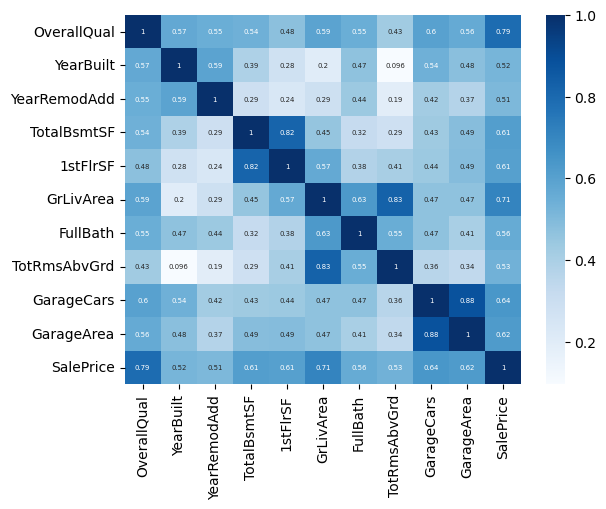

In [289]:
cor = df.corr()
highest_corr_features = cor.index[abs(cor["SalePrice"])>0.5]
sns.heatmap(df[highest_corr_features].corr(),annot=True,annot_kws={"fontsize":5},cmap="Blues")

From the above heatmap we can observe that these features

OverallQual

YearBuilt

YearRemodAdd

TotalBsmtSF

1stFlrSF

GrLivArea

FullBath

TotRmsAbvGrd

GarageCars

GarageArea

have a the most corelation with SalePrice

<AxesSubplot: xlabel='YrSold', ylabel='SalePrice'>

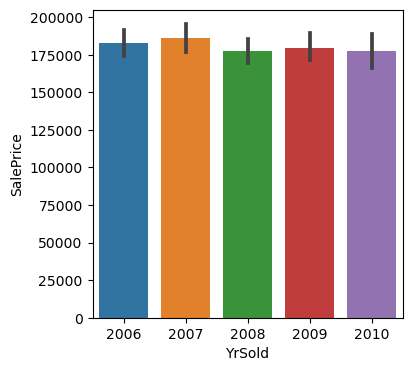

In [290]:
plt.figure(figsize=(4,4))
sns.barplot(x=df["YrSold"],y=df["SalePrice"])

<AxesSubplot: xlabel='OverallCond', ylabel='SalePrice'>

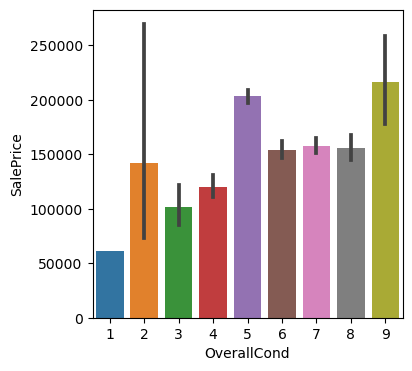

In [291]:
plt.figure(figsize=(4,4))
sns.barplot(x=df["OverallCond"],y=df["SalePrice"])

In the above plot we can see a linear relationship between Overall Condition and SalePrice

## Feature Selection 

Based on the correlation matrix we can choose 
1.OverallQual
2.YearBuilt
3.YearRemodAdd
4.TotalBsmtSF
5.1stFlrSF
6.GrLivArea
7.FullBath
8.TotRmsAbvGrd
9.GarageCars 
10.GarageArea

additionally have selected a few more numerical features

11.LotArea
12.FullBath
13.HalfBath
14.BedroomAbvGr
15.YearBuilt

and we apply The K-Best feature selection technique which is a specific type of univariate feature selection that uses a statistical test to select the best features in a dataset. This technique is useful when the number of features is large, as it allows you to select the most important features that explain the most variance in the data. The K-Best technique is also useful for feature selection in classification tasks, as it can help identify which features are most important in determining the class labels.

In [292]:
X = df[['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','GarageCars','GarageArea','LotArea','FullBath','HalfBath','BedroomAbvGr','YearBuilt']]
y = df['SalePrice']


select = SelectKBest(score_func=f_regression, k=12)
z = select.fit_transform(X,y)
print("After selecting best 3 features:", z.shape)

filter = select.get_support()
features = array(['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','GarageCars','GarageArea','LotArea','FullBath','HalfBath','BedroomAbvGr','YearBuilt'])

print("Selected best 12:")
print(features[filter])



After selecting best 3 features: (1460, 12)
Selected best 12:
['OverallQual' 'YearBuilt' 'YearRemodAdd' 'TotalBsmtSF' '1stFlrSF'
 'GrLivArea' 'FullBath' 'TotRmsAbvGrd' 'GarageCars' 'GarageArea'
 'FullBath' 'YearBuilt']


## Removing Outliers 

In order to to remove the extreme values from these data and remove the outliers, we must first apply the standard deviation. Using the function below, we apply two standard deviations to the specified numerical features in order to do this.

In [293]:
def remove_outliers(dataset, columns, nsd):

    for col in columns:
    
        mean = dataset[col].mean()
        sd = dataset[col].std()
        dataset = dataset[dataset[col] < mean + (nsd * sd)]

    return dataset

dataset_wo_outliers = remove_outliers(df, ['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','GarageCars','GarageArea'], 2)

print(f' Size before removing the outliers from the dataset {df.size}')
print(f' Size after removing the outliers from the dataset {dataset_wo_outliers.size}')

X = dataset_wo_outliers[['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','GarageCars','GarageArea']]
y = dataset_wo_outliers['SalePrice']

 Size before removing the outliers from the dataset 110960
 Size after removing the outliers from the dataset 88160


## Applying Multi-Linear Regression
For Modeling we will be applying multi-linear regression for modelling and we split data 30% for test and the remaning 70% for training also we scale the values before trainning the data.

In [294]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

reg = LinearRegression()
reg.fit(X_train, y_train)

print("Interceptor value: ", reg.intercept_)
print("Slope or coefficient value: ", reg.coef_)

Interceptor value:  156316.74014778325
Slope or coefficient value:  [12922.50162399  9763.70738517  6702.40922512  8077.91339565
  2975.56353201 21164.41238496 -2928.49504038 -3385.44623919
  1659.90458246  4282.59768876]


## Evaluating the Performance of the model

To Evaluate the Performance of the model we will be using mean absolute error , mean squared error , root mean squared error

In [295]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: { mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')

Mean Absolute Error: 15221.57
Mean Squared Error: 488972715.56
Root Mean Squared Error: 22112.73


<Figure size 400x400 with 0 Axes>

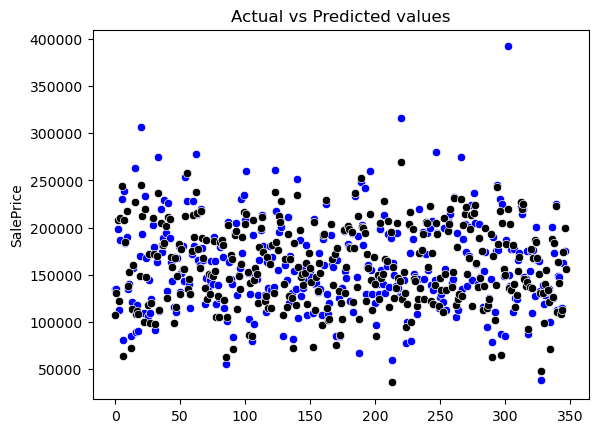

<Figure size 400x400 with 0 Axes>

In [296]:
sns.scatterplot(x=range(len(y_test)), y=y_test, color='blue')
sns.scatterplot(x=range(len(y_pred)), y=y_pred, color='black')
plt.title("Actual vs Predicted values")
plt.figure(figsize=(4,4))

### Adding String Categorical Variables to the Model
 
 In the step we will also introduce some Categorical Features to the model and build the model and measure if it improves the performance, for which we will use these features Foundation,ExterQual, ExterCond,KitchenQual,SaleCondition

### Encoding Categorical Variables 
At this step we have selected 5 string variables at random, we need to converted these values to numeric to apply linear regression, for this we use the OrdinalEncoder() function to convert them.

In [310]:
from sklearn.preprocessing import OrdinalEncoder 

enc = OrdinalEncoder()
enc.fit(df[["Foundation","ExterQual", "ExterCond","KitchenQual","SaleCondition"]])
df[["Foundation","ExterQual", "ExterCond","KitchenQual","SaleCondition"]] = enc.transform(df[["Foundation","ExterQual", "ExterCond","KitchenQual","SaleCondition"]])

Again we apply KBest algorithm to figure out the best features out of the selected features

In [311]:
X = df[['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','GarageCars','GarageArea','FullBath','YearBuilt','ExterQual','KitchenQual','SaleCondition','ExterCond','Foundation']]
y = df['SalePrice']

select = SelectKBest(score_func=f_regression, k=14)
z = select.fit_transform(X,y)
print("After selecting best 3 features:", z.shape)

filter = select.get_support()
features = array(['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','GarageCars','GarageArea','FullBath','YearBuilt','ExterQual','KitchenQual','SaleCondition','ExterCond','Foundation'])

print("Selected best 14:")
print(features[filter])


After selecting best 3 features: (1460, 14)
Selected best 14:
['OverallQual' 'YearBuilt' 'YearRemodAdd' 'TotalBsmtSF' '1stFlrSF'
 'GrLivArea' 'FullBath' 'TotRmsAbvGrd' 'GarageCars' 'GarageArea'
 'FullBath' 'YearBuilt' 'ExterQual' 'KitchenQual']


### Re-Trainning the model with new features

In [312]:
dataset_wo_outliers = remove_outliers(df, ['OverallQual' ,'TotalBsmtSF', '1stFlrSF' ,'GrLivArea' ,'FullBath', 'TotRmsAbvGrd' ,'GarageCars' ,'GarageArea' ,'FullBath' ,'YearBuilt', 'ExterQual', 'KitchenQual'], 2)

print(f' Size before removing the outliers from the dataset {df.size}')
print(f' Size after removing the outliers from the dataset {dataset_wo_outliers.size}')

X = dataset_wo_outliers[['OverallQual' ,'TotalBsmtSF', '1stFlrSF' ,'GrLivArea' ,'FullBath', 'TotRmsAbvGrd' ,'GarageCars' ,'GarageArea' ,'FullBath' ,'YearBuilt', 'ExterQual', 'KitchenQual']]
y = dataset_wo_outliers['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)


reg = LinearRegression()
reg.fit(X_train, y_train)

print("Interceptor value: ", reg.intercept_)
print("Slope or coefficient value: ", reg.coef_)

 Size before removing the outliers from the dataset 110960
 Size after removing the outliers from the dataset 88160
Interceptor value:  156316.74014778322
Slope or coefficient value:  [12430.1396012   7891.06110264  2597.0141866  20212.47480829
 -1482.66363854 -2332.59900211  1626.75229275  4223.28098776
 -1482.66363854 10913.83361551 -5295.90875357 -3213.4722067 ]


In [313]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: { mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')


Mean Absolute Error: 15639.21
Mean Squared Error: 495858252.21
Root Mean Squared Error: 22267.87


<Figure size 400x400 with 0 Axes>

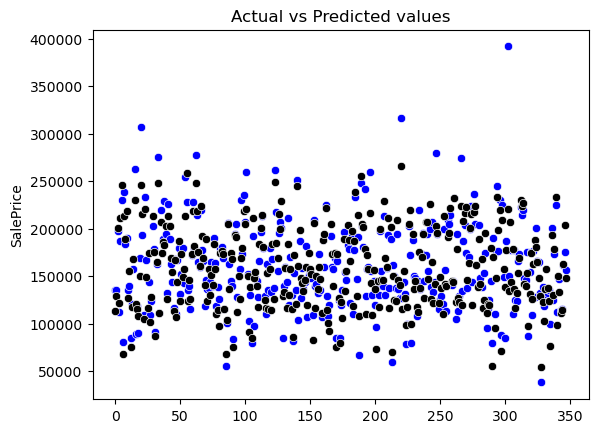

<Figure size 400x400 with 0 Axes>

In [314]:
sns.scatterplot(x=range(len(y_test)), y=y_test, color='blue')
sns.scatterplot(x=range(len(y_pred)), y=y_pred, color='black')
plt.title("Actual vs Predicted values")
plt.figure(figsize=(4,4))

## Conclusion 
IIn above analysis we used house sales data to predict the sales values based on Multi-Linear Regression
Model. A step-by-step methodology was followed by first pre-processing the data by cleaning the data,
treating missing values, outlier detection, feature selection and scaling. After training the model with the 
numerical features, we saw that RMSE value was 22112.73 after adding the string features and repeating 
the steps and retraining we can see that the values have reduced to 22267.87, Among the string feature there were some had some minimal distance from slope or intercept value ,which may have led to the minor decrease , further experimentation with the different feature may help us to find the best fit in this scenario.
